# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

#### Analysis

* As the Latitude moves away from zero, the max temp generally drops.
This makes sense as the further from the equator you travel the more angled
the suns rays are, and areas generally receive less of them.

* There seems to be some abnormality in the data where the cloudiness groups
in the 0%, 20%, 40%, 68% and 100% ranges….  This is likely due to data grouping
by the data provider.

* Wind Speed seldom reaches above 20 mph.  This is likely because we live on
Earth instead of Mars.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
import requests
import time
from winsound import Beep


# Import API key
from api_keys import *

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
outputDataFile = "../output_data/"
apiKey = weather_api_key

# Range of latitudes and longitudes
latRange = (-90, 90)
longRange = (-180, 180)\

frequency = 500
duration = 300

print(apiKey[0])

d


## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
latLongs = []
cities = []
nations = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(latRange[0], latRange[1], size=1500)
longs = np.random.uniform(longRange[0], longRange[1], size=1500)
latLongs = zip(lats, longs)

# Identify nearest city for each lat, lng combination
for latLong in latLongs:
    city = citipy.nearest_city(latLong[0], latLong[1]).city_name
    nation = citipy.nearest_city(latLong[0], latLong[1]).country_code
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        nations.append(nation.upper())

# Print the city count to confirm sufficient count
print(len(cities))
print(len(nations))

619
619


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
returnCount = 0
groupCount = 0
cityIndex = 0
cloudList = []
dateList = []
humidityList = []
latitudeList = []
longitudeList = []
maxTempList = []
windspeedList = []
removeList = []


startDeclaration = "###################\n Start API Request \n###################"
endDeclaration = "######################\n Complete API Request \n#######################"

baseUrl = f"http://api.openweathermap.org/data/2.5/weather?appid={apiKey}&units=imperial&q="

print(startDeclaration)
for city in cities:
    
    apiReturn = requests.get(baseUrl + city.replace(" ","&")).json()


    try:
        print(f'Processing Weather Data for Record {returnCount} of Group {groupCount} | {apiReturn["name"]}')
        
        if apiReturn["main"]["humidity"] <= 100:
            cloudList.append(apiReturn["clouds"]["all"])
            dateList.append(apiReturn["dt"])
            humidityList.append(apiReturn["main"]["humidity"])
            latitudeList.append(apiReturn["coord"]["lat"])
            longitudeList.append(apiReturn["coord"]["lon"])
            maxTempList.append(apiReturn["main"]["temp_max"])
            windspeedList.append(apiReturn["wind"]["speed"])
    
    except (KeyError, IndexError):
        print("City not found....Skipping............")
        removeList.append(cityIndex)
        print(removeList[-1])
        
    if returnCount == 55:
        groupCount += 1
        returnCount = 0
        time.sleep(60)
        
    returnCount += 1
    cityIndex += 1

print(endDeclaration)

Beep(frequency, duration)
time.sleep(1)
Beep(frequency, duration)
time.sleep(1)
Beep(frequency, duration)
time.sleep(1)
Beep(frequency, duration)
time.sleep(1)
Beep(frequency, duration)
time.sleep(1)
Beep(frequency, duration)
time.sleep(1)
Beep(frequency, duration)


###################
 Start API Request 
###################
Processing Weather Data for Record 0 of Group 0 | Khatanga
Processing Weather Data for Record 1 of Group 0 | Iqaluit
Processing Weather Data for Record 2 of Group 0 | Andenes
Processing Weather Data for Record 3 of Group 0 | Port
Processing Weather Data for Record 4 of Group 0 | Qaanaaq
Processing Weather Data for Record 5 of Group 0 | Homer
Processing Weather Data for Record 6 of Group 0 | Mataura
Processing Weather Data for Record 7 of Group 0 | Rikitea
Processing Weather Data for Record 8 of Group 0 | Dzaoudzi
Processing Weather Data for Record 9 of Group 0 | Cape
City not found....Skipping............
10
Processing Weather Data for Record 11 of Group 0 | San
Processing Weather Data for Record 12 of Group 0 | El Puerto de Santa María
Processing Weather Data for Record 13 of Group 0 | Kapaa
Processing Weather Data for Record 14 of Group 0 | San
Processing Weather Data for Record 15 of Group 0 | Avarua
Processing Weather Data

Processing Weather Data for Record 34 of Group 2 | Kropotkin
Processing Weather Data for Record 35 of Group 2 | Chui
City not found....Skipping............
146
Processing Weather Data for Record 37 of Group 2 | Hobart
Processing Weather Data for Record 38 of Group 2 | Portobelo
Processing Weather Data for Record 39 of Group 2 | Bilma
Processing Weather Data for Record 40 of Group 2 | Dikson
Processing Weather Data for Record 41 of Group 2 | Weligama
Processing Weather Data for Record 42 of Group 2 | Krasnogorsk
Processing Weather Data for Record 43 of Group 2 | Sioux
Processing Weather Data for Record 44 of Group 2 | Itarema
Processing Weather Data for Record 45 of Group 2 | Severo-Kuril'sk
Processing Weather Data for Record 46 of Group 2 | Tsogni
City not found....Skipping............
157
Processing Weather Data for Record 48 of Group 2 | Port
Processing Weather Data for Record 49 of Group 2 | Ribeira
Processing Weather Data for Record 50 of Group 2 | Sidi
Processing Weather Data for 

Processing Weather Data for Record 12 of Group 5 | Kikwit
Processing Weather Data for Record 13 of Group 5 | Royan
Processing Weather Data for Record 14 of Group 5 | Atasū
Processing Weather Data for Record 15 of Group 5 | Samfya
Processing Weather Data for Record 16 of Group 5 | Baykit
City not found....Skipping............
292
Processing Weather Data for Record 18 of Group 5 | Porirua
City not found....Skipping............
294
Processing Weather Data for Record 20 of Group 5 | Béziers
Processing Weather Data for Record 21 of Group 5 | Cidreira
City not found....Skipping............
297
City not found....Skipping............
298
City not found....Skipping............
299
Processing Weather Data for Record 25 of Group 5 | Kahului
City not found....Skipping............
301
Processing Weather Data for Record 27 of Group 5 | Mursalimkino
Processing Weather Data for Record 28 of Group 5 | Rio
City not found....Skipping............
304
Processing Weather Data for Record 30 of Group 5 | Cama

Processing Weather Data for Record 46 of Group 7 | Imbituba
Processing Weather Data for Record 47 of Group 7 | Tūkrah
Processing Weather Data for Record 48 of Group 7 | Sindor
Processing Weather Data for Record 49 of Group 7 | Penukonda
City not found....Skipping............
435
Processing Weather Data for Record 51 of Group 7 | Kodinsk
Processing Weather Data for Record 52 of Group 7 | Bismarck
Processing Weather Data for Record 53 of Group 7 | Shetpe
Processing Weather Data for Record 54 of Group 7 | Nelson
Processing Weather Data for Record 55 of Group 7 | Jining
Processing Weather Data for Record 1 of Group 8 | Brigantine
Processing Weather Data for Record 2 of Group 8 | Rawson
Processing Weather Data for Record 3 of Group 8 | Hobyo
Processing Weather Data for Record 4 of Group 8 | Kathmandu
Processing Weather Data for Record 5 of Group 8 | Biskamzha
Processing Weather Data for Record 6 of Group 8 | Dolores
Processing Weather Data for Record 7 of Group 8 | Cabo
Processing Weather D

Processing Weather Data for Record 20 of Group 10 | Asău
Processing Weather Data for Record 21 of Group 10 | Vallentuna
City not found....Skipping............
572
Processing Weather Data for Record 23 of Group 10 | Saurimo
Processing Weather Data for Record 24 of Group 10 | Ucluelet
Processing Weather Data for Record 25 of Group 10 | Santiago
Processing Weather Data for Record 26 of Group 10 | Port
Processing Weather Data for Record 27 of Group 10 | Ikom
Processing Weather Data for Record 28 of Group 10 | Tuy
Processing Weather Data for Record 29 of Group 10 | Kołobrzeg
Processing Weather Data for Record 30 of Group 10 | Newcastle
Processing Weather Data for Record 31 of Group 10 | Bafra
Processing Weather Data for Record 32 of Group 10 | Kuah
Processing Weather Data for Record 33 of Group 10 | Yumen
Processing Weather Data for Record 34 of Group 10 | Alirajpur
City not found....Skipping............
585
Processing Weather Data for Record 36 of Group 10 | Padang
Processing Weather Data 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
nuCities = cities
nuNations = nations

print(
    f"cities count: {len(nuCities)} \n"
    f"nations count: {len(nuNations)} \n"
    f"clouds count: {len(cloudList)} \n"
    f"date count: {len(dateList)} \n"
    f"humidity count: {len(humidityList)} \n"
    f"lat count: {len(latitudeList)} \n"
    f"long count: {len(longitudeList)} \n"
    f"temp count: {len(maxTempList)} \n"
    f"wind speed count: {len(windspeedList)} \n"
    )

cities count: 619 
nations count: 619 
clouds count: 556 
date count: 556 
humidity count: 556 
lat count: 556 
long count: 556 
temp count: 556 
wind speed count: 556 



In [6]:
removeList.reverse()
for item in removeList:
    nuCities.pop(item)
    nuNations.pop(item)

print(
    f"cities count: {len(nuCities)} \n"
    f"nations count: {len(nuNations)} \n"
    f"clouds count: {len(cloudList)} \n"
    f"date count: {len(dateList)} \n"
    f"humidity count: {len(humidityList)} \n"
    f"lat count: {len(latitudeList)} \n"
    f"long count: {len(longitudeList)} \n"
    f"temp count: {len(maxTempList)} \n"
    f"wind speed count: {len(windspeedList)} \n"
    )



cities count: 556 
nations count: 556 
clouds count: 556 
date count: 556 
humidity count: 556 
lat count: 556 
long count: 556 
temp count: 556 
wind speed count: 556 



In [7]:
weatherDict = {
    "City" : nuCities,
    "Cloudiness" : cloudList,
    "Nation" : nuNations,
    "Date" : dateList,
    "Humidity" : humidityList,
    "Latitude" : latitudeList,
    "Longitude" : longitudeList,
    "Max Temp" : maxTempList,
    "Wind Speed" : windspeedList
}

weatherFrame = pd.DataFrame(weatherDict)
weatherFrame.to_csv(outputDataFile + "citiesFinal.csv")
weatherFrame.head()

,City,Cloudiness,Nation,Date,Humidity,Latitude,Longitude,Max Temp,Wind Speed
0,khatanga,26,RU,1618859766,100,71.9667,102.5000,-17.59,2.62
1,iqaluit,75,CA,1618859580,79,63.7506,-68.5145,21.20,6.91
2,andenes,0,NO,1618859766,66,69.3143,16.1194,46.40,5.75
3,port alfred,100,ZA,1618859733,81,-7.0349,29.7638,72.45,4.59
4,qaanaaq,100,GL,1618859766,75,77.4840,-69.3632,8.28,7.05


In [8]:
nuWeatherFrame = weatherFrame
nuWeatherFrame.head()

,City,Cloudiness,Nation,Date,Humidity,Latitude,Longitude,Max Temp,Wind Speed
0,khatanga,26,RU,1618859766,100,71.9667,102.5000,-17.59,2.62
1,iqaluit,75,CA,1618859580,79,63.7506,-68.5145,21.20,6.91
2,andenes,0,NO,1618859766,66,69.3143,16.1194,46.40,5.75
3,port alfred,100,ZA,1618859733,81,-7.0349,29.7638,72.45,4.59
4,qaanaaq,100,GL,1618859766,75,77.4840,-69.3632,8.28,7.05


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [9]:
# these data points were removed in the API calls
nuWeatherFrame.describe()

,Cloudiness,Date,Humidity,Latitude,Longitude,Max Temp,Wind Speed
count,556.000000,5.560000e+02,556.000000,556.000000,556.000000,556.000000,556.000000
mean,54.188849,1.618860e+09,65.944245,22.300306,23.296379,60.208939,7.732680
std,41.008045,2.637648e+02,23.885209,32.304824,85.193706,22.041986,4.960094
min,0.000000,1.618859e+09,6.000000,-54.800000,-175.200000,-17.590000,0.200000
25%,7.750000,1.618860e+09,49.000000,-4.375450,-46.037475,46.400000,4.155000
50%,67.000000,1.618860e+09,72.000000,27.616300,27.386150,63.965000,6.910000
75%,99.000000,1.618860e+09,84.000000,48.846500,93.167550,77.957500,10.360000
max,100.000000,1.618861e+09,100.000000,78.218600,179.316700,100.620000,31.070000


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

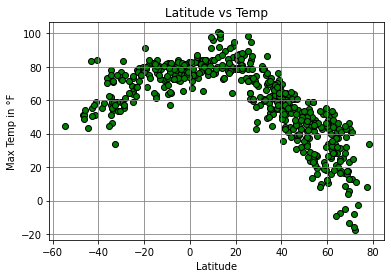

<Figure size 432x288 with 0 Axes>

In [10]:
plt.scatter(nuWeatherFrame["Latitude"], nuWeatherFrame["Max Temp"], edgecolors = "black", facecolors = "green")
plt.grid(b = True, which = "both", color = "grey")
plt.ylabel("Max Temp in °F")
plt.xlabel("Latitude")
plt.title("Latitude vs Temp")
plt.show()
plt.savefig(outputDataFile + "Fig1.png")


## Latitude vs. Humidity Plot

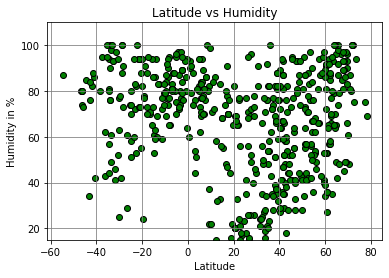

<Figure size 432x288 with 0 Axes>

In [11]:
plt.scatter(nuWeatherFrame["Latitude"], nuWeatherFrame["Humidity"], edgecolors = "black", facecolors = "green")
plt.grid(b = True, which = "both", color = "grey")
plt.ylim(15, 110)
plt.ylabel("Humidity in %")
plt.xlabel("Latitude")
plt.title("Latitude vs Humidity")
plt.show()
plt.savefig(outputDataFile + "Fig2.png")


## Latitude vs. Cloudiness Plot

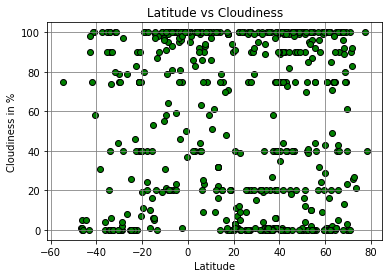

<Figure size 432x288 with 0 Axes>

In [12]:
plt.scatter(nuWeatherFrame["Latitude"], nuWeatherFrame["Cloudiness"], edgecolors = "black", facecolors = "green")
plt.grid(b = True, which = "both", color = "grey")
plt.ylabel("Cloudiness in %")
plt.xlabel("Latitude")
plt.title("Latitude vs Cloudiness")
plt.show()
plt.savefig(outputDataFile + "Fig3.png")


## Latitude vs. Wind Speed Plot

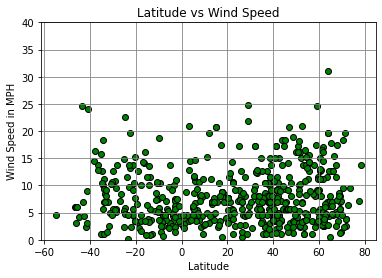

<Figure size 432x288 with 0 Axes>

In [13]:
plt.scatter(nuWeatherFrame["Latitude"], nuWeatherFrame["Wind Speed"], edgecolors = "black", facecolors = "green")
plt.grid(b = True, which = "both", color = "grey")
plt.ylim(0, 40)
plt.ylabel("Wind Speed in MPH")
plt.xlabel("Latitude")
plt.title("Latitude vs Wind Speed")
plt.show()
plt.savefig(outputDataFile + "Fig4.png")


## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.388


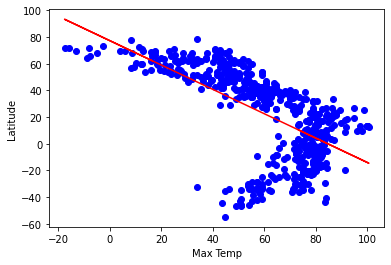

In [14]:
weaFrame = nuWeatherFrame.groupby(["City"]).mean() 

xValues = weaFrame["Max Temp"]
yValues = weaFrame["Latitude"]

(slope, intercept, rvalue, pvalue, stdrr) = st.linregress(xValues, yValues)
regressVal = xValues * slope + intercept

line = (f"y = {round(slope, 2)} x + {round(intercept, 2)}")

plt.scatter(xValues, yValues,color='b')

plt.plot(weaFrame["Max Temp"], regressVal, color='red')
plt.xlabel("Max Temp")
plt.ylabel("Latitude")
print(f"The r-squared is: {round(rvalue**2,3)}")

plt.show()

# Well, this is wrong

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.388


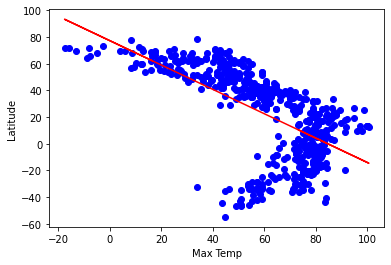

In [15]:
xValues = weaFrame["Max Temp"]
yValues = weaFrame["Latitude"]

(slope, intercept, rvalue, pvalue, stdrr) = st.linregress(xValues, yValues)
regressVal = xValues * slope + intercept

line = (f"y = {round(slope, 2)} x + {round(intercept, 2)}")

plt.scatter(xValues, yValues,color='b')

plt.plot(weaFrame["Max Temp"], regressVal, color='red')
plt.xlabel("Max Temp")
plt.ylabel("Latitude")
print(f"The r-squared is: {round(rvalue**2,3)}")

plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression